     product  total_qty  revenue
0  Product A         18   1800.0
1  Product B         12   2400.0
2  Product C          3    900.0


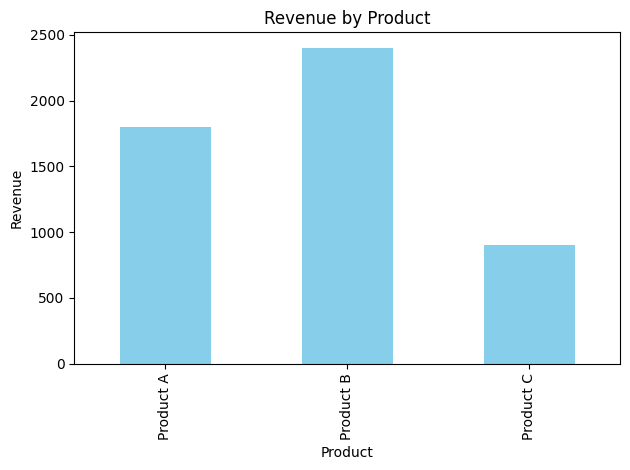

In [1]:
import sqlite3

# Connect
conn = sqlite3.connect('sales_data.db')
cursor = conn.cursor()

# Create sales table
cursor.execute('''
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
''')

# Insert data
sample_data = [
    ('Product A', 10, 100.0),
    ('Product B', 5, 200.0),
    ('Product A', 8, 100.0),
    ('Product C', 3, 300.0),
    ('Product B', 7, 200.0)
]

cursor.executemany('INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)', sample_data)
conn.commit()
import pandas as pd

# Define the SQL query
query = '''
SELECT
    product,
    SUM(quantity) AS total_qty,
    SUM(quantity * price) AS revenue
FROM
    sales
GROUP BY
    product
'''


df = pd.read_sql_query(query, conn)

# Display
print(df)
import matplotlib.pyplot as plt

# bar chart of revenue per product
df.plot(kind='bar', x='product', y='revenue', color='skyblue', legend=False)
plt.title('Revenue by Product')
plt.xlabel('Product')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()
